In [247]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

In [213]:
#read and load the dataset into pandas dataframe
df=pd.read_excel('cdc_90519_DS1.xlsx')

In [214]:
#checking dataframe types
#checking number of columns and rows in dataframe
print(df.dtypes)
print(type(df))
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(df.shape[0], df.shape[1]))

COUNTY_NAME                     object
STATE_NAME                      object
STATE_FIPS                       int64
CNTY_FIPS                        int64
FIPS                             int64
county_pop2018_18 and older      int64
anycondition_prevalence        float64
anycondition_Lower 95% CI      float64
anycondition_Upper 95% CI      float64
anycondition_number              int64
Obesity_prevalence             float64
Obesity_Lower 95% CI           float64
Obesity_Upper 95% CI           float64
Obesity_number                   int64
Heart disease_prevalence       float64
Heart disease_Lower 95% CI     float64
Heart disease_Upper 95% CI     float64
Heart disease_number             int64
COPD_prevalence                float64
COPD_Lower 95% CI              float64
COPD_Upper 95% CI              float64
COPD_number                      int64
diabetes_prevalence            float64
diabetes_Lower 95% CI          float64
diabetes_Upper 95% CI          float64
diabetes_number          

In [215]:
#checking to see % of dataframe that has missing values
(df.isnull().sum().sum()/df.size)*100

0.0

In [216]:
df.describe()

,STATE_FIPS,CNTY_FIPS,FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3142.000000,3142.000000,3142.000000,3.142000e+03,3142.000000,3142.000000,3142.000000,3.142000e+03,3142.000000,3142.000000,...,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.00000,3142.000000,3142.000000
mean,30.280076,103.572884,30383.649268,8.076642e+04,46.790070,44.654519,48.834596,3.336550e+04,35.016232,33.403278,...,5823.736792,13.072502,12.087237,14.052546,9320.989815,3.445799,3.207129,3.70993,2464.753024,4.636219
std,15.144339,107.704060,15162.508374,2.584437e+05,6.379469,6.369535,6.382508,9.885835e+04,4.517515,4.464692,...,15716.160574,2.724288,2.622841,2.824812,29745.951127,0.568151,0.527801,0.61326,7728.183525,1.510359
min,1.000000,1.000000,1001.000000,8.800000e+01,22.000000,20.600000,23.500000,4.100000e+01,15.200000,14.300000,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.90000,3.000000,1.000000
25%,18.000000,35.000000,18177.500000,8.436250e+03,42.900000,40.800000,45.000000,4.206000e+03,32.400000,30.800000,...,813.500000,11.200000,10.300000,12.100000,1187.000000,3.100000,2.900000,3.30000,314.000000,3.000000
50%,29.000000,79.000000,29176.000000,2.021200e+04,47.200000,45.000000,49.300000,9.743000e+03,35.400000,33.700000,...,1962.500000,12.800000,11.800000,13.800000,2742.500000,3.400000,3.200000,3.70000,717.000000,5.000000
75%,45.000000,133.000000,45080.500000,5.277450e+04,51.000000,48.900000,53.100000,2.497075e+04,37.900000,36.300000,...,4721.500000,14.800000,13.700000,15.900000,6665.750000,3.800000,3.500000,4.10000,1775.000000,6.000000
max,56.000000,840.000000,56045.000000,7.916625e+06,66.200000,64.000000,68.200000,2.877316e+06,49.900000,47.700000,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.60000,237766.000000,6.000000


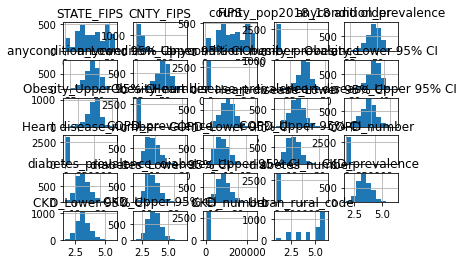

In [217]:
df.hist()
plt.show()

In [218]:
df.head(10)

,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,...,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,STAB
0,Autauga,Alabama,1,1,1001,42438,47.6,45.4,49.4,20181,...,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3,AL
1,Baldwin,Alabama,1,3,1003,170912,40.2,38.2,42.3,68790,...,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4,AL
2,Barbour,Alabama,1,5,1005,19689,57.5,55.6,59.1,11325,...,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6,AL
3,Bibb,Alabama,1,7,1007,17813,51.6,49.6,53.4,9190,...,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2,AL
4,Blount,Alabama,1,9,1009,44448,46.3,44.3,48.4,20584,...,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2,AL
5,Bullock,Alabama,1,11,1011,8001,60.7,58.6,62.6,4853,...,20.6,19.4,21.9,1651,4.5,4.2,4.8,360,6,AL
6,Butler,Alabama,1,13,1013,15302,58.1,56.2,59.7,8891,...,18.6,17.5,19.5,2841,4.3,4.1,4.6,662,6,AL
7,Calhoun,Alabama,1,15,1015,89582,53.6,51.6,55.5,48041,...,14.7,13.6,15.7,13182,3.6,3.3,3.8,3204,4,AL
8,Chambers,Alabama,1,17,1017,26623,55.7,54.2,57.4,14836,...,17.5,16.6,18.5,4664,4.0,3.8,4.2,1068,5,AL
9,Cherokee,Alabama,1,19,1019,21042,55.9,53.7,58.1,11769,...,15.9,14.7,17.2,3353,3.9,3.6,4.2,814,6,AL


In [219]:
#read and load the dataset into pandas dataframe
df2=pd.read_csv('comm_vul.csv')

In [220]:
#checking dataframe types
#checking number of columns and rows in dataframe
print(df2.dtypes)
print(type(df2))
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(df2.shape[0], df2.shape[1]))

STATE                                                         object
ST_ABBR                                                       object
STCNTY                                                         int64
COUNTY                                                        object
FIPS                                                           int64
County FIPS                                                    int64
LOCATION                                                      object
Total Score                                                   object
Max Possible Score                                             int64
Hardest Hit Area (HHA)                                        object
HHA Score                                                      int64
Low Income Area (LIA) County SAIPE - (Poverty Percentage)    float64
Low Income Area (LIA) County SAIPE- Score                      int64
Low Income Area (LIA) Census Tract (Poverty Percentage)      float64
Low Income Area (LIA) Census Tract

In [221]:
#checking to see % of dataframe that has missing values
(df2.isnull().sum().sum()/df2.size)*100

0.04147746487422356

In [222]:
df2.describe()    

,STCNTY,FIPS,County FIPS,Max Possible Score,HHA Score,Low Income Area (LIA) County SAIPE - (Poverty Percentage),Low Income Area (LIA) County SAIPE- Score,Low Income Area (LIA) Census Tract (Poverty Percentage),Low Income Area (LIA) Census Tract - Score,Rural,Rural - Score
count,72836.000000,7.283600e+04,72836.000000,72836.000000,72836.000000,72836.000000,72836.000000,72262.000000,72836.000000,72836.000000,72836.000000
mean,27830.694135,2.783095e+10,27830.694135,14.924927,6.369845,0.127164,4.005808,0.146481,5.559201,0.212724,1.063622
std,15813.578470,1.581358e+10,15813.578470,9.404650,7.079037,0.046769,5.373873,0.115919,6.214616,0.409237,2.046186
min,1001.000000,1.001020e+09,1001.000000,0.000000,0.000000,0.027000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12127.000000,1.212708e+10,12127.000000,7.000000,0.000000,0.094000,0.000000,0.062400,0.000000,0.000000,0.000000
50%,27131.000000,2.713107e+10,27131.000000,15.000000,0.000000,0.125000,0.000000,0.114700,7.000000,0.000000,0.000000
75%,41039.000000,4.103900e+10,41039.000000,22.000000,15.000000,0.150000,7.000000,0.197600,15.000000,0.000000,0.000000
max,56045.000000,5.604595e+10,56045.000000,50.000000,15.000000,0.477000,15.000000,1.000000,15.000000,1.000000,5.000000


In [223]:
df2.head(5)

,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,County FIPS,LOCATION,Total Score,Max Possible Score,Hardest Hit Area (HHA),HHA Score,Low Income Area (LIA) County SAIPE - (Poverty Percentage),Low Income Area (LIA) County SAIPE- Score,Low Income Area (LIA) Census Tract (Poverty Percentage),Low Income Area (LIA) Census Tract - Score,Tribal Community\n(1 if yes),Tribal Community\nScore (Geographic Only),Rural,Rural - Score
0,ALABAMA,AL,1001,Autauga,1001020100,1001,"Census Tract 201, Autauga County, Alabama",7,7,ModerateBurdenResolving,0,0.121,0,0.1666,7,Non-Tribal,0,0,0
1,ALABAMA,AL,1001,Autauga,1001020200,1001,"Census Tract 202, Autauga County, Alabama",7,7,ModerateBurdenResolving,0,0.121,0,0.1913,7,Non-Tribal,0,0,0
2,ALABAMA,AL,1001,Autauga,1001020300,1001,"Census Tract 203, Autauga County, Alabama",7,7,ModerateBurdenResolving,0,0.121,0,0.1725,7,Non-Tribal,0,0,0
3,ALABAMA,AL,1001,Autauga,1001020400,1001,"Census Tract 204, Autauga County, Alabama",0,0,ModerateBurdenResolving,0,0.121,0,0.0464,0,Non-Tribal,0,0,0
4,ALABAMA,AL,1001,Autauga,1001020500,1001,"Census Tract 205, Autauga County, Alabama",7,7,ModerateBurdenResolving,0,0.121,0,0.1516,7,Non-Tribal,0,0,0


In [227]:
merged_df = pd.merge(df, df2, left_on='FIPS', right_on='County FIPS')

In [230]:
merged_df.describe()

,STATE_FIPS,CNTY_FIPS,FIPS_x,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,...,FIPS_y,County FIPS,Max Possible Score,HHA Score,Low Income Area (LIA) County SAIPE - (Poverty Percentage),Low Income Area (LIA) County SAIPE- Score,Low Income Area (LIA) Census Tract (Poverty Percentage),Low Income Area (LIA) Census Tract - Score,Rural,Rural - Score
count,72836.000000,72836.000000,72836.000000,7.283600e+04,72836.000000,72836.000000,72836.000000,7.283600e+04,72836.000000,72836.000000,...,7.283600e+04,72836.000000,72836.000000,72836.000000,72836.000000,72836.000000,72262.000000,72836.000000,72836.000000,72836.000000
mean,27.744687,86.007441,27830.694135,8.916270e+05,41.749200,39.953420,43.498352,3.417368e+05,31.574596,30.292215,...,2.783095e+10,27830.694135,14.924927,6.369845,0.127164,4.005808,0.146481,5.559201,0.212724,1.063622
std,15.789068,99.707803,15813.578470,1.537808e+06,6.612149,6.460567,6.742327,5.711989e+05,5.146011,4.978600,...,1.581358e+10,15813.578470,9.404650,7.079037,0.046769,5.373873,0.115919,6.214616,0.409237,2.046186
min,1.000000,1.000000,1001.000000,1.000000e+02,22.000000,20.600000,23.500000,4.700000e+01,15.200000,14.300000,...,1.001020e+09,1001.000000,0.000000,0.000000,0.027000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,29.000000,12127.000000,8.945100e+04,37.000000,35.300000,38.800000,3.966500e+04,28.000000,26.900000,...,1.212708e+10,12127.000000,7.000000,0.000000,0.094000,0.000000,0.062400,0.000000,0.000000,0.000000
50%,27.000000,63.000000,27131.000000,3.582290e+05,41.700000,39.600000,43.500000,1.418230e+05,31.900000,30.500000,...,2.713107e+10,27131.000000,15.000000,0.000000,0.125000,0.000000,0.114700,7.000000,0.000000,0.000000
75%,41.000000,109.000000,41039.000000,9.780170e+05,46.300000,44.300000,48.300000,3.372860e+05,35.200000,33.900000,...,4.103900e+10,41039.000000,22.000000,15.000000,0.150000,7.000000,0.197600,15.000000,0.000000,0.000000
max,56.000000,840.000000,56045.000000,7.916625e+06,66.200000,64.000000,68.200000,2.877316e+06,49.900000,47.700000,...,5.604595e+10,56045.000000,50.000000,15.000000,0.477000,15.000000,1.000000,15.000000,1.000000,5.000000


In [234]:
print(merged_df.dtypes)
print(type(merged_df))
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(merged_df.shape[0], merged_df.shape[1]))

COUNTY_NAME                                                   object
STATE_NAME                                                    object
STATE_FIPS                                                     int64
CNTY_FIPS                                                      int64
FIPS_x                                                         int64
county_pop2018_18 and older                                    int64
anycondition_prevalence                                      float64
anycondition_Lower 95% CI                                    float64
anycondition_Upper 95% CI                                    float64
anycondition_number                                            int64
Obesity_prevalence                                           float64
Obesity_Lower 95% CI                                         float64
Obesity_Upper 95% CI                                         float64
Obesity_number                                                 int64
Heart disease_prevalence          

In [248]:
#dropping null values
merged_df = merged_df.dropna()

#using get dummies to encode
y = pd.get_dummies(merged_df['Hardest Hit Area (HHA)'], drop_first=True)

#feature selection
X = merged_df[[
    'anycondition_prevalence',
    'Obesity_prevalence',
    'Heart disease_prevalence',
    'COPD_prevalence',
    'diabetes_prevalence',
    'CKD_prevalence',
    'Urban_rural_code',
    'Low Income Area (LIA) County SAIPE - (Poverty Percentage)',
    'Rural'
]]

#standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#using SMOTE to oversample minority class
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y.values.argmax(axis=1))

#training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, stratify=y_smote, random_state=42)

#param defining
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

#logistic regression
log_reg = LogisticRegression(multi_class='ovr')

#using gridsearch
grid_search = GridSearchCV(log_reg, param_grid, scoring='accuracy', cv=StratifiedKFold(5), verbose=1)

#fitting model
grid_search.fit(X_train, y_train)

#results
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

#assessing model
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.49045482344350794
              precision    recall  f1-score   support

           0       0.54      0.69      0.60      5548
           1       0.42      0.45      0.44      5548
           2       0.62      0.89      0.73      5548
           3       0.39      0.21      0.27      5549
           4       0.35      0.33      0.34      5549
           5       0.48      0.35      0.41      5548

    accuracy                           0.49     33290
   macro avg       0.47      0.49      0.46     33290
weighted avg       0.47      0.49      0.46     33290



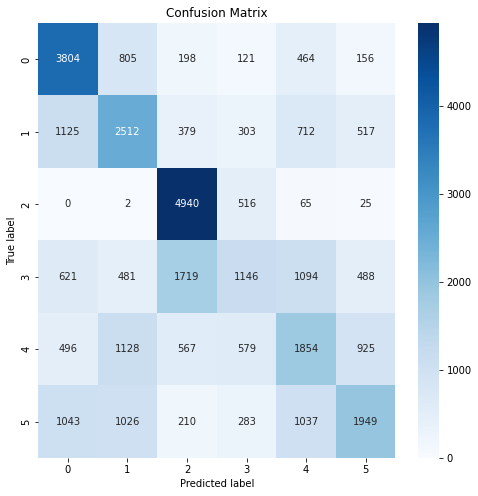

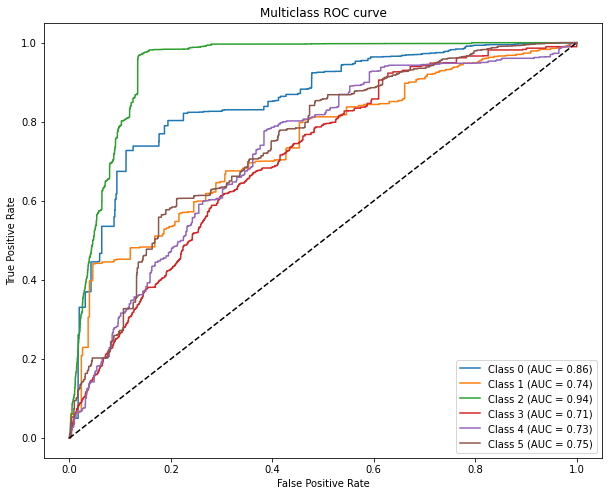

In [249]:
#plotting confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

#plotting ROC for multi class
def plot_multiclass_roc(y_true, y_pred_prob, n_classes):
    #binarize output
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    y_pred_prob_bin = y_pred_prob
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    #compputing ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    #plotting ROC curves
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC curve')
    plt.legend(loc="lower right")
    plt.show()

y_pred_prob = grid_search.predict_proba(X_test)
plot_multiclass_roc(y_test, y_pred_prob, n_classes=6)

In [250]:
matrix=confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(matrix)

Confusion matrix:
[[3804  805  198  121  464  156]
 [1125 2512  379  303  712  517]
 [   0    2 4940  516   65   25]
 [ 621  481 1719 1146 1094  488]
 [ 496 1128  567  579 1854  925]
 [1043 1026  210  283 1037 1949]]
